<a href="https://colab.research.google.com/github/greensky0107/self_study/blob/main/Day32_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[학습목표]

지도학습(회귀) 모델을 활용할 수 있다.

최적의 하이퍼파라미터를 찾을 수 있다.

모델을 평가할 수 있다.

In [ ]:
# 라이브러리 불러오기
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error # Regression Evaluation

In [ ]:
# 데이터 생성
from sklearn.datasets import load_diabetes # 당뇨병 환자 데이터

def make_dataset():
    dataset = load_diabetes()
    df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
    df['target'] = dataset.target
    X_train, X_test, y_train, y_test = train_test_split(
        df.drop('target', axis=1), df['target'], test_size=0.2, random_state=1004)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = make_dataset()
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((353, 10), (89, 10), (353,), (89,))

In [ ]:
# 데이터 확인 - X_train
X_train.head(3)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 353 entries, 152 to 2
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     353 non-null    float64
 1   sex     353 non-null    float64
 2   bmi     353 non-null    float64
 3   bp      353 non-null    float64
 4   s1      353 non-null    float64
 5   s2      353 non-null    float64
 6   s3      353 non-null    float64
 7   s4      353 non-null    float64
 8   s5      353 non-null    float64
 9   s6      353 non-null    float64
dtypes: float64(10)
memory usage: 30.3 KB


In [ ]:
# 데이터 확인 - X_test
X_test.head(3)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89 entries, 111 to 73
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     89 non-null     float64
 1   sex     89 non-null     float64
 2   bmi     89 non-null     float64
 3   bp      89 non-null     float64
 4   s1      89 non-null     float64
 5   s2      89 non-null     float64
 6   s3      89 non-null     float64
 7   s4      89 non-null     float64
 8   s5      89 non-null     float64
 9   s6      89 non-null     float64
dtypes: float64(10)
memory usage: 7.6 KB


In [ ]:
# 데이터 확인 - y_train
y_train.head(3)
y_train.info()

<class 'pandas.core.series.Series'>
Index: 353 entries, 152 to 2
Series name: target
Non-Null Count  Dtype  
--------------  -----  
353 non-null    float64
dtypes: float64(1)
memory usage: 5.5 KB


<Axes: >

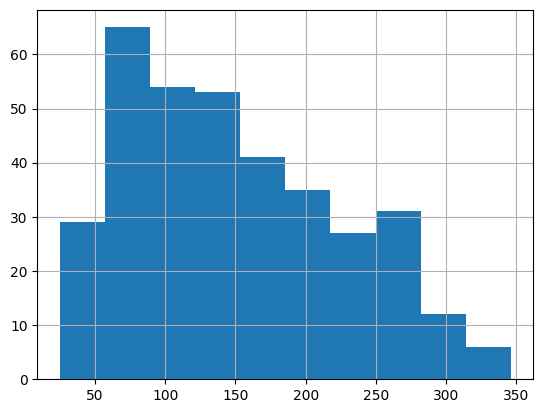

In [ ]:
# 데이터 확인 - y_train graph
y_train.hist()

In [ ]:
# 데이터 확인 - y_test
y_test.head(3)
y_test.info()

<class 'pandas.core.series.Series'>
Index: 89 entries, 111 to 73
Series name: target
Non-Null Count  Dtype  
--------------  -----  
89 non-null     float64
dtypes: float64(1)
memory usage: 1.4 KB


[회귀 종류]

1. 선형회귀 (Linear Regression)

 - 단순 선형회귀와 다중 선형회귀가 있지만 흔히 사용하는 것은 다중 선형회귀

 - Feature가 한 개인 경우가 드물기 때문에 보통 feature가 두 개 이상인 다중 선형회귀를 사용

    용어). 비용함수

      - 데이터와 모델 간의 거리를 계산.  (데이터-실제값,  모델-예측값)

      - 비용함수(cost function)= 손실함수(loss function) = 목적함수 (다 같은 뜻)

      - 오차(error)를 계산합니다. (실제 값과 예측값의 차이)

      - 평균 제곱 오차를 최소화하는 파라미터를 찾음.

    용어). 경사하강법 (Gradient Descent)

      - 오차를 찾아 나가는 방식

      - 비용함수의 기울기 절대값이 가장 작은 지점을 찾아서 오차가 작은 모델을 만듬.

In [ ]:
# 1. 선형 회귀
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train) # Train 학습
pred = model.predict(X_test) # Predict 예측
mean_squared_error(y_test, pred) # Evaluate 평가

2707.6318521641583

2. 릿지 회귀 (Ridge Regression)

 - 오버피팅 문제로 규제(regularization)를 적용한 모델

 - 규제 방식: L2 규제

 - 파라미터(alpha) 값을 활용해 조절

 - alpha 값이 커질수록 회귀 계수 값을 작게 만듦

 - 규제(alpha)를 통해서 모델의 성능을 올릴 수 있습니다.

In [ ]:
# 2. 릿지 회귀
from sklearn.linear_model import Ridge
model = Ridge(alpha=1) # 릿지 회귀모델의 alpha default 는 1
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred) # 선형회귀보다 오차값이 더 큼.  회귀계수 (alpha 값) 조정 필요

3522.1191842072667

In [ ]:
# 회귀 계수 - Ridge Regression
coef = pd.DataFrame(data=model.coef_, index=X_train.columns, columns=['alpha1'])
coef

,alpha1
age,4.275162
sex,-205.210484
bmi,450.909749
bp,331.923682
s1,-84.311149
s2,-54.662514
s3,-158.706512
s4,114.066890
s5,391.231834
s6,78.555458


In [ ]:
# 릿지 회귀 (alpha=10)
model = Ridge(alpha=10)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

5521.884843903383

In [ ]:
# 회귀 계수 (alpha 10) Ridge Regression
coef['alpha10'] = model.coef_  # alpha1과 alpha10과 비교해보면 bmi가 줄어듬.
coef

,alpha1,alpha10
age,4.275162,16.703166
sex,-205.210484,-1.796418
bmi,450.909749,61.026376
bp,331.923682,47.434846
s1,-84.311149,18.491238
s2,-54.662514,13.440104
s3,-158.706512,-35.542087
s4,114.066890,38.896140
s5,391.231834,55.276290
s6,78.555458,35.868345


In [ ]:
# 릿지 회귀 (alpha=0.1)
model = Ridge(alpha=0.1)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

2744.9026742146693

In [ ]:
# 회귀 계수 (alpha 0.1) Ridge Regression
coef['alpha0.1'] = model.coef_  # alpha 1과 feature 값이 동일
coef

,alpha1,alpha10,alpha0.1
age,4.275162,16.703166,4.275162
sex,-205.210484,-1.796418,-205.210484
bmi,450.909749,61.026376,450.909749
bp,331.923682,47.434846,331.923682
s1,-84.311149,18.491238,-84.311149
s2,-54.662514,13.440104,-54.662514
s3,-158.706512,-35.542087,-158.706512
s4,114.066890,38.896140,114.066890
s5,391.231834,55.276290,391.231834
s6,78.555458,35.868345,78.555458


In [ ]:
# 릿지 회귀 (alpha=0.05)
model = Ridge(alpha=0.05)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)  # alpha 1, 10, 0.1, 0.05 중에서  오차값이 제일 적음.  alpha 값이 작을수록 오차값이 적어짐.

2699.6595785438317

In [ ]:
# 회귀 계수 (alpha 0.05) Ridge Regression
coef['alpha0.05'] = model.coef_
coef

,alpha1,alpha10,alpha0.1,alpha0.05
age,4.275162,16.703166,4.275162,-0.508850
sex,-205.210484,-1.796418,-205.210484,-223.345659
bmi,450.909749,61.026376,450.909749,469.447848
bp,331.923682,47.434846,331.923682,348.368885
s1,-84.311149,18.491238,-84.311149,-146.952481
s2,-54.662514,13.440104,-54.662514,-18.297550
s3,-158.706512,-35.542087,-158.706512,-141.658486
s4,114.066890,38.896140,114.066890,115.860926
s5,391.231834,55.276290,391.231834,432.508101
s6,78.555458,35.868345,78.555458,69.578796


3. 라쏘 회귀 (Lasso Regression)

 - 오버피팅 문제로 규제(regularization)를 적용한 모델

 - 규제 방식: L1 규제 (중요한 피처만 선택하는 특성)

 - L2에 비해 회귀 계수를 급격히 감소시켜 중요하다고 생각하는 피처만 선택하고 나머지는 0으로 만듦

  - 규제방식 비교

      릿지 회귀 : L2 규제 방식
   
      라쏘 회귀 : L1 규제 방식 (중요한 피처만 선택하는 특성)

In [ ]:
# 라쏘 회귀
from sklearn.linear_model import Lasso
model = Lasso(alpha=1)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

4179.152642946343

In [ ]:
# 회귀 계수 Lasso Regression
coef = pd.DataFrame(data=model.coef_, index=X_train.columns, columns=['alpha1'])
coef # 중요한 feature인 bmi, bp, s5 만 남겨놓고 나머지 다 0으로 처리함.

,alpha1
age,0.000000
sex,-0.000000
bmi,343.589790
bp,46.369923
s1,0.000000
s2,0.000000
s3,-0.000000
s4,0.000000
s5,245.170617
s6,0.000000


In [ ]:
# 라쏘 회귀 (alpha=2)
model = Lasso(alpha=2)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

6398.637179449031

In [ ]:
# 회귀 계수 (alpha=2) Lasso Regression
coef['alpha2'] = model.coef_
coef # bmi만 남고 다 0으로 처리됨.  안정적이지 않음.  오차값이 높아짐.  alpha값을 줄이는 방향으로 featuring 해봐야.

,alpha1,alpha2
age,0.000000,0.000000
sex,-0.000000,0.000000
bmi,343.589790,42.963888
bp,46.369923,0.000000
s1,0.000000,0.000000
s2,0.000000,0.000000
s3,-0.000000,-0.000000
s4,0.000000,0.000000
s5,245.170617,0.000000
s6,0.000000,0.000000


In [ ]:
# 라쏘 회귀 (alpha=0.05)
model = Lasso(alpha=0.05)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

2703.4583679188177

In [ ]:
# 회귀 계수 (alpha=0.05) Lasso Regression
coef['alpha0.05'] = model.coef_
coef  # alpha 값이 낮을 수록 오차값이 적어짐

,alpha1,alpha2,alpha0.05
age,0.000000,0.000000,-0.000000
sex,-0.000000,0.000000,-198.948213
bmi,343.589790,42.963888,487.198584
bp,46.369923,0.000000,340.490360
s1,0.000000,0.000000,-95.576361
s2,0.000000,0.000000,-0.000000
s3,-0.000000,-0.000000,-189.867452
s4,0.000000,0.000000,10.487703
s5,245.170617,0.000000,457.332197
s6,0.000000,0.000000,39.292925


4. 엘라스틱넷 회귀 (ElasticNet Regression)

 - 오버피팅 문제로 규제(regularization)를 적용한 모델

 - 규제 방식: L2 규제와 L1 규제 (중요한 피처만 선택하는 특성) 결합

 - 시간이 상대적으로 오래 걸림

 - 규제방식 비교

      릿지 회귀 : L2 규제 방식

      라쏘 회귀 : L1 규제 방식 (중요한 피처만 선택하는 특성)

      엘라스틱넷 회귀 : L2+L1 규제 결합 방식

In [ ]:
# 엘라스틱넷 회귀
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=1) # alpha defaul 는 1
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

6539.270961171604

In [ ]:
# 엘라스틱넷 회귀
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=0.0001, l1_ratio=0.6)  # L1 규제 비율을 지정할 수 있음. dafaul는 0.5 (반반)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

2675.6031657225312

5. 랜덤포레스트

 - 여러 개의 의사결정 트리로 구성

 - 앙상블 방법 중 배깅(bagging) 방식

 - 부트스트랩 샘플링 (데이터셋 중복 허용)

 - 최종 다수결 투표


6. XGBoost

 - 트리 앙상블 중 성능이 좋은 알고리즘

 - eXtreme Gradient Boosting을 줄여서 XGBoost라고 한다.

 - 약한 학습기가 계속해서 업데이트를 하며 좋은 모델을 만들어 간다.

In [ ]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

3460.7575224719103

In [ ]:
# Xgboost
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

4265.475533439266

[Hyperparameter Tuning]

 - 모델의 성능 향상을 위해 하이퍼파라미터 튜닝을 진행

 - 사이킷런의 model_selection에서 제공하는 GridSearchCV와 RandomizedSearchCV를 이용


1. GridSearchCV

 - grid search를 통해 최적의 하이퍼파라미터를 찾음 (시간 오래 걸림)


2. RandomizedSearchCV

 - RandomizedSearchCV 는 GridSearchCV와 달리 랜덤으로 N개의 조합만 탐색함
(시간 내 최적의 하이퍼파라미터 탐색)

In [ ]:
# 라이브러리 불러오기
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
# Hyperparameter 와  Space 정하기
# 시간이 오래 걸려 learning_rate와 subsample는 주석 처리함
params={'learning_rate':[0.07, 0.05],
        'max_depth':[3, 5, 7],
        'n_estimators':[100, 200],
        'subsample':[0.9, 0.8, 0.7]
        }

In [ ]:
# 데이터셋 로드
def make_dataset2():
    dataset = load_diabetes()
    df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
    df['target'] = dataset.target
    return df.drop('target', axis=1), df['target']
X, y = make_dataset2()

In [ ]:
# GridSearchCV  (시간이 오래 걸림)
#  'max_depth':[3, 5, 7],  'n_estimators':[100, 200]만 적용 시 3분 내외
xgb = XGBRegressor()
grid = GridSearchCV(xgb, params, cv=5, n_jobs=-1)  # Close Validation (defaul는 5인데 줄임.)
grid.fit(X, y)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.07, 0.05], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200],
                         'subsample': [0.9, 0.8, 0.7]})

In [ ]:
# GridSearch를 통해 최적의 하이퍼파라미터를 찾음
grid.best_params_

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.9}

In [ ]:
# Hyperparameter Tuning for XGBoost Regression
xgb = XGBRegressor(learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.9)
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
mean_squared_error(y_test, pred)

3179.8831661279423

In [ ]:
#  Randomized Search
xgb = XGBRegressor()
grid = RandomizedSearchCV(xgb, params, cv=3, n_iter=10, n_jobs=-1)
grid.fit(X, y)

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.07, 0.05],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200],
                                        'subsample': [0.9, 0.8, 0.7]})

In [ ]:
# Randomized Searh를 통해 최적의 하이퍼파라미터를 찾음
grid.best_params_

{'subsample': 0.8, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.05}

In [ ]:
# Hyperparameter Tuning for XGBoost Regression
xgb = XGBRegressor(learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8)
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
mean_squared_error(y_test, pred)

3154.3336034377185

[평가지표]

MAE (Mean Absolute Error, 평균 절대 오차)
 - 실제값과 예측값의 차이 (절대값 평균)

MSE (Mean Squared Error, 평균 제곱 오차)
 - 실제값과 예측값의 차이 (제곱해서 평균)

RMSE (Root Mean Squared Error, MSE에 루트를 씌움)
 - MSE가 실제 오류보다 커지는 특성이 있어서 루트를 사용함

RMSLE (Root Mean Squared Log Error, RMSE에 로그 적용)
 - 예측값이 실제값보다 작을 때, 더 큰 penalty 부여  (예를 들어 배달 시간을 20분 예측했는데, 실제로 40분이 걸리면 더 문제가 됨)

R2 (R Squared Score, 결정계수)
 - 실제값의 분산 대비, 예측값의 분산 계산 (1에 가까울수록 성능이 좋음)

In [ ]:
# MAE (Mean Absolute Error)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pred)

47.63303135218245

In [ ]:
# MSE (Mean Squared Error)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred)

3154.3336034377185

In [111]:
# RMSE (Root Mean Squared Error) LMS node에서는 numpy를 통해서 root를 씌웠으나, scikit-learn에 함수도 있음.
# import numpy as np
# np.sqrt(mean_squared_error(y_test, pred))

from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(y_test, pred)

56.163454340324535

In [118]:
# RMSLE (Root Mean Squared Log Error) LMS node에서는 numpy를 통해서 root를 씌웠으나, scikit-learn에 함수도 있음.
# from sklearn.metrics import mean_squared_log_error
# np.sqrt(mean_squared_log_error(y_test, pred))

from sklearn.metrics import root_mean_squared_log_error
root_mean_squared_log_error(y_test, pred)

0.4313809448103214

In [119]:
# R2 (R Squared Score)
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.5182398701894719

[보스턴 주택 가격 회귀 구현 - Linear Regression]

target 은 PRICE.  

Linear Regression model 썼을 때,  MSE (mean squared error)는 17.297  R2score (결정계수)는 0.757

**Question : MSE와 R2 Score로 보았을 때,  Linear Regression Model이 보스턴 주택 가격에서  예측력이 좋다고 할 수 있나?

In [136]:
# Library 가져오기
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Dataset 가져오기
# import를 다른걸로 바꿔주고
from sklearn.datasets import fetch_openml
boston = fetch_openml(name='boston')
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)
# 이 부분 두개가 카테고리 데이터로 되어있어서 수치형으로 변환해주세요!
bostonDF['RAD'] = pd.to_numeric(bostonDF['RAD'], errors='coerce') #RAD 고속도로 접근 용이도
bostonDF['CHAS'] = pd.to_numeric(bostonDF['CHAS'], errors='coerce') #CHAS 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면0)
bostonDF['PRICE'] = boston.target
print('Boston House Price 데이터 세트 크기:', bostonDF.shape)
bostonDF.head(3)

Boston House Price 데이터 세트 크기: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7


In [137]:
# 데이터 확인
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


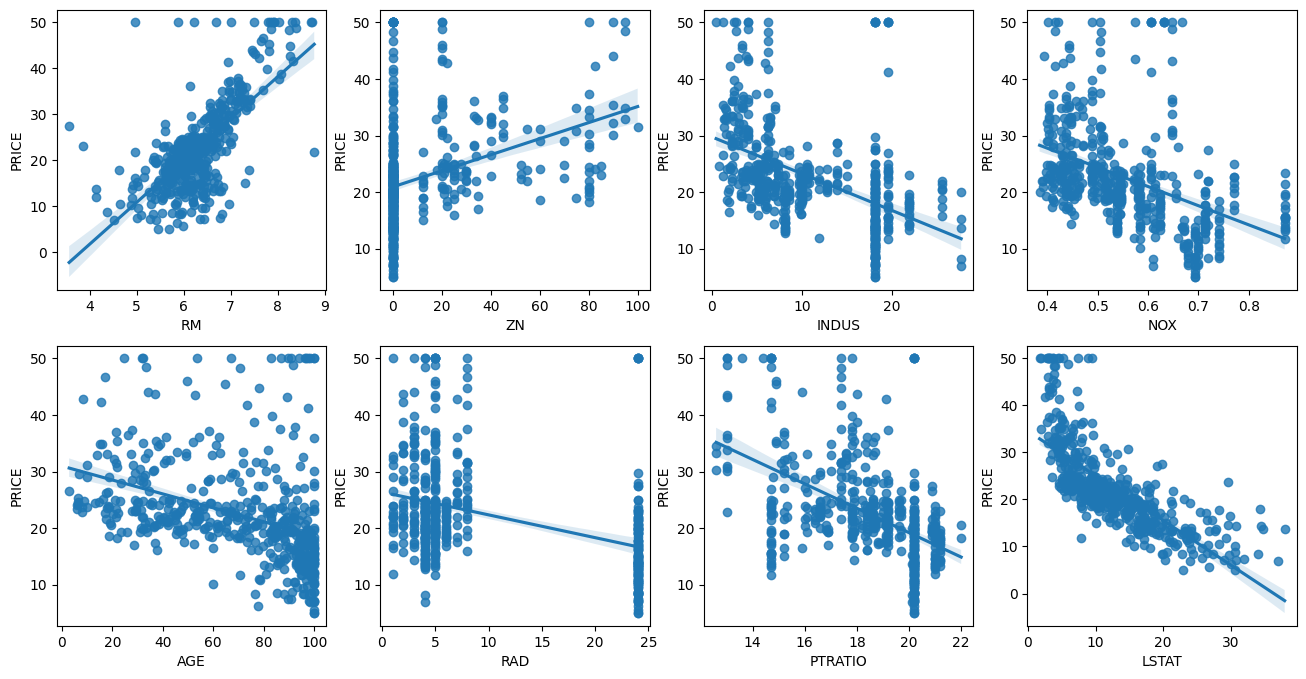

In [146]:
# graph를 그려 Price(종속변수)에 영향을 주는 feature(독립변수)를 찾아봄.

fig, axs= plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features=['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'RAD', 'PTRATIO', 'LSTAT']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col]) # 중앙선에 얼마나 수렴하는 지 잘 볼 것

In [147]:
# Correlation 함수로 Price(종속변수)에 영향을 가장 많이 주는 feature(독립변수)를 알아봄.

bostonDF.corr() # Price vs. RM 0.6953,  Price vs. LSTAT -0.7376   RM과 LSTAT가 가장 상관관계가 높음

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [156]:
# 필요한 library 확인
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Dataset 분리전에, target (Price)를 y_target으로 별도 저장.
# Dataset 분리전에, train-test dataset에서는 target(Price)를 drop하고,  X_data로 저장
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

# X_data를 trian_test_split 함
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

# Linear Regression OLS (ordinary least squares)로 train,predict,validate.
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

# Validation Score (Mean Squared Error, Root Mean Squared Error) 와 Variance Score ( R2 Score) 출력
print('MSE : {0:.3f}, RMSE : {1:.3F}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297, RMSE : 4.159
Variance score : 0.757


In [157]:
# Intercept(절편)과 Coefficients(회귀 계수) 출력

print('절편 값:', lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: 40.995595172164826
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [158]:
# 회귀 계수를 큰 값 순으로 정력하기 위해 Series로 생성. 인덱스 칼럼명에 주의할것

coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

,0
RM,3.4
CHAS,3.0
RAD,0.4
ZN,0.1
INDUS,0.0
B,0.0
TAX,-0.0
AGE,0.0
CRIM,-0.1
LSTAT,-0.6


In [165]:
# 필요한 library 확인
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Import the cross_val_score function
from sklearn.model_selection import cross_val_score # This line imports the missing function

# Dataset 분리전에, target (Price)를 y_target으로 별도 저장.
# Dataset 분리전에, train-test dataset에서는 target(Price)를 drop하고,  X_data로 저장
# Linear Regression으로 학습, 예측
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
lr=LinearRegression()

# 평가
# cross_val_score로 5 폴드세트로 MSE (mean squared error)를 구한 뒤 이를 기반으로 다시 RMSE (root mena squred error) 구함
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score로 반환된 값은 모두 음수
print('5 folds의 개별 Negative MSE scores:', np.round(neg_mse_scores, 2))
print('5 folds의 개별 RMSE scores;', np.round(rmse_scores, 3))
print('5 folds의 평균 RMSE:{0:3f} ', format(avg_rmse))

5 folds의 개별 Negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores; [3.53  5.104 5.751 8.987 5.772]
5 folds의 평균 RMSE:{0:3f}  5.828658946215802
